## Importing the Libraries

In [1]:
# Libraries for Data Preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Libraries for Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Libraries for measuring accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
%matplotlib inline

## Importing the Dataset

In [2]:
df = pd.read_csv("C:/Users/MacTavish/Google Drive/Master/Big Data and Data Science/Capstone Projekt/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Drawing the correlation graph

<AxesSubplot:>

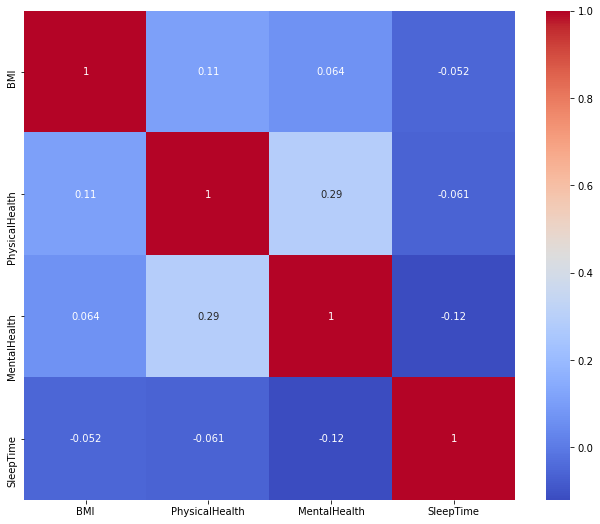

In [3]:
import matplotlib
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Checking Columns of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Unique Values

In [5]:
print(df['Smoking'].unique())
print(df['AlcoholDrinking'].unique())
print(df['Stroke'].unique())
print(df['DiffWalking'].unique())
print(df['Sex'].unique())
print(df['AgeCategory'].unique())
print(df['Race'].unique())
print(df['Diabetic'].unique())
print(df['PhysicalActivity'].unique())
print(df['GenHealth'].unique())
print(df['Asthma'].unique())
print(df['KidneyDisease'].unique())
print(df['SkinCancer'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


## Encoding of text to 1 & 0

In [6]:
def change(col):
    if col=='Yes':
        return 1
    elif col=='No':
        return 0

df['Smoking'] = df['Smoking'].apply(change)
df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(change)
df['Stroke'] = df['Stroke'].apply(change)
df['DiffWalking'] = df['DiffWalking'].apply(change)
df['PhysicalActivity'] = df['PhysicalActivity'].apply(change)
df['Asthma'] = df['Asthma'].apply(change)
df['KidneyDisease'] = df['KidneyDisease'].apply(change)
df['SkinCancer'] = df['SkinCancer'].apply(change)
df['HeartDisease'] = df['HeartDisease'].apply(change)

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


## Encoding all columns with more than 2 values

In [8]:
le = LabelEncoder()

# encoding columns that have more than 2 unique values
df['Sex']=le.fit_transform(df['Sex'])
df['AgeCategory']=le.fit_transform(df['AgeCategory'])
df['Race']=le.fit_transform(df['Race'])
df['Diabetic']=le.fit_transform(df['Diabetic'])
df['GenHealth']=le.fit_transform(df['GenHealth'])

In [9]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

## Splitting Dataset into Training and Test Set

In [11]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2)

## Training Models

### Logistic Regression

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred1 = logreg.predict(X_test)
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

C:\Users\MacTavish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87748
           1       0.53      0.08      0.13      8191

    accuracy                           0.92     95939
   macro avg       0.72      0.54      0.54     95939
weighted avg       0.89      0.92      0.89     95939

0.9153211936751477
0.8295996098849501


### Decision Tree

In [13]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

y_pred2 = tree.predict(X_test)
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     87748
           1       0.24      0.25      0.24      8191

    accuracy                           0.87     95939
   macro avg       0.58      0.59      0.58     95939
weighted avg       0.87      0.87      0.87     95939

0.8664151179395241
0.5884757350027228


### Decision Tree mit Hyperparametertuning

In [14]:
parameters = {'max_depth':range(1,30), 
              'min_samples_leaf':[1, 10, 20, 30, 50, 100]}
tree_CV = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state=1),parameters, cv=5)
tree_CV.fit(X_train, y_train)

y_pred3 = tree_CV.predict(X_test)
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(roc_auc_score(y_test, tree_CV.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87748
           1       0.52      0.05      0.10      8191

    accuracy                           0.91     95939
   macro avg       0.72      0.52      0.53     95939
weighted avg       0.88      0.91      0.88     95939

0.9149146853729975
0.8283023348172758


In [15]:
tree_CV.best_params_

{'max_depth': 8, 'min_samples_leaf': 100}

### Random Forest

In [16]:
forest = RandomForestClassifier(criterion='entropy',n_estimators=500)
forest.fit(X_train, y_train)

y_pred4 = forest.predict(X_test)
print(classification_report(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(roc_auc_score(y_test, forest.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87748
           1       0.36      0.12      0.17      8191

    accuracy                           0.91     95939
   macro avg       0.64      0.55      0.56     95939
weighted avg       0.87      0.91      0.88     95939

0.9067115563013999
0.8022155640846454


### Random Forest with Hyperparametertuning

In [17]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7,10,12,14],
    'min_samples_leaf': [1,2,4,6,8],
    'criterion': ['entropy','gini']
}

In [18]:
rcv = RandomizedSearchCV(estimator=forest,param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1)
rcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 25.9min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=500),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 7, 10, 12,
                                                              14],
                                        'n_estimators': [2, 12, 23, 34, 45, 56,
                                                         67,

In [19]:
rcv.best_params_

{'n_estimators': 78,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [20]:
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=78)

In [22]:
forest_RCV = RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=8, min_samples_split=5, n_estimators=78, max_features="auto")
forest_RCV.fit(X_train, y_train)

y_pred5 = forest_RCV.predict(X_test)
print(classification_report(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(roc_auc_score(y_test, forest_RCV.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87748
           1       0.56      0.06      0.10      8191

    accuracy                           0.92     95939
   macro avg       0.74      0.53      0.53     95939
weighted avg       0.89      0.92      0.88     95939

0.9156026224997134
0.8381035843494666


### XGBoost

In [23]:
boost = XGBClassifier()
boost.fit(X_train, y_train)

y_pred6 = boost.predict(X_test)
print(classification_report(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(roc_auc_score(y_test, boost.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87748
           1       0.52      0.10      0.16      8191

    accuracy                           0.92     95939
   macro avg       0.72      0.54      0.56     95939
weighted avg       0.89      0.92      0.89     95939

0.9151127278791732
0.8406573223105397


### XGBoost mit Hyperparametertuning

In [24]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [25]:
rcv = RandomizedSearchCV(estimator=boost,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1)
rcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 26.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=

In [26]:
rcv.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [27]:
rcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
boost_RCV = XGBClassifier(min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.4)
clf = boost_RCV.fit(X_train, y_train)

y_pred7 = boost_RCV.predict(X_test)
print(classification_report(y_test,y_pred7))
print(accuracy_score(y_test,y_pred7))
print(roc_auc_score(y_test, boost_RCV.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87748
           1       0.54      0.09      0.15      8191

    accuracy                           0.92     95939
   macro avg       0.73      0.54      0.55     95939
weighted avg       0.89      0.92      0.89     95939

0.9157798184262917
0.8452036616192737


# Save

### Save Test and Training Data

In [ ]:
df.iloc[X_train.index,:].to_csv("data.csv", index=False)
df.iloc[X_test.index,:].drop("HeartDisease", axis=1).to_csv("new_data.csv", index=False)

### Save Model

In [29]:
import pickle
filename = 'finalized_default_model_v2.2.sav'
pickle.dump(clf, open(filename, 'wb'))